In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Dump Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  object 
 1   Journey_day        452088 non-null  object 
 2   Airline            452088 non-null  object 
 3   Flight_code        452088 non-null  object 
 4   Class              452088 non-null  object 
 5   Source             452088 non-null  object 
 6   Departure          452088 non-null  object 
 7   Total_stops        452088 non-null  object 
 8   Arrival            452088 non-null  object 
 9   Destination        452088 non-null  object 
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 44.8+ MB


In [4]:
df.describe()

,Duration_in_hours,Days_left,Fare
count,452088.000000,452088.000000,452088.000000
mean,12.349222,25.627902,22840.100890
std,7.431478,14.300846,20307.963002
min,0.750000,1.000000,1307.000000
25%,6.583300,13.000000,8762.750000
50%,11.333300,26.000000,13407.000000
75%,16.500000,38.000000,35587.000000
max,43.583300,50.000000,143019.000000


In [5]:
df2=df

In [6]:
def pie_plots(column, title):
    counts = df[column].value_counts()

    # Create the pie chart
    fig, ax = plt.subplots()
    pie = ax.pie(counts,labels= counts.index, autopct='%1.1f%%', 
                 wedgeprops={ 'linewidth' : 2, 'edgecolor' : 'white' },
                 startangle=150,labeldistance=1.1)
    # Add a circle at the center of the chart to create the donut shape
    center_circle = plt.Circle((0, 0), 0.8, fc='white')
    fig.gca().add_artist(center_circle)

    plt.text(0, 0, column, ha='center', va='center', fontsize=10)
    plt.title(title, fontsize=18)
    # Show the plot
    plt.show()
    

<Figure size 2000x800 with 0 Axes>

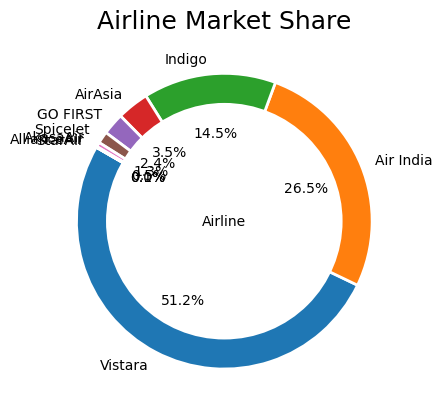

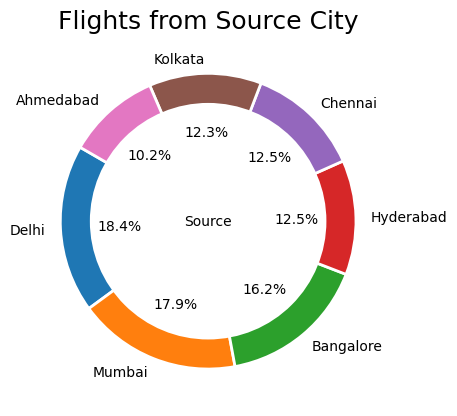

In [7]:
plt.figure(figsize=(20,8))
pie_plots('Airline', 'Airline Market Share')
pie_plots('Source', 'Flights from Source City')

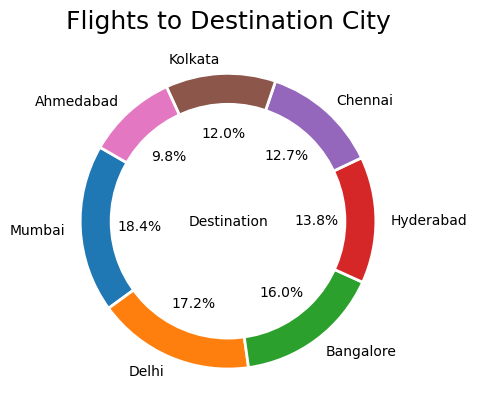

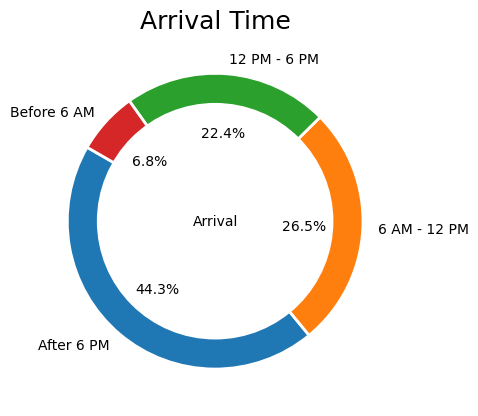

In [8]:
pie_plots('Destination', 'Flights to Destination City')
pie_plots('Arrival', 'Arrival Time')

In [9]:
df['Date_of_journey']= pd.to_datetime(df['Date_of_journey'])

In [10]:
df.drop('Flight_code',axis=1,inplace = True)

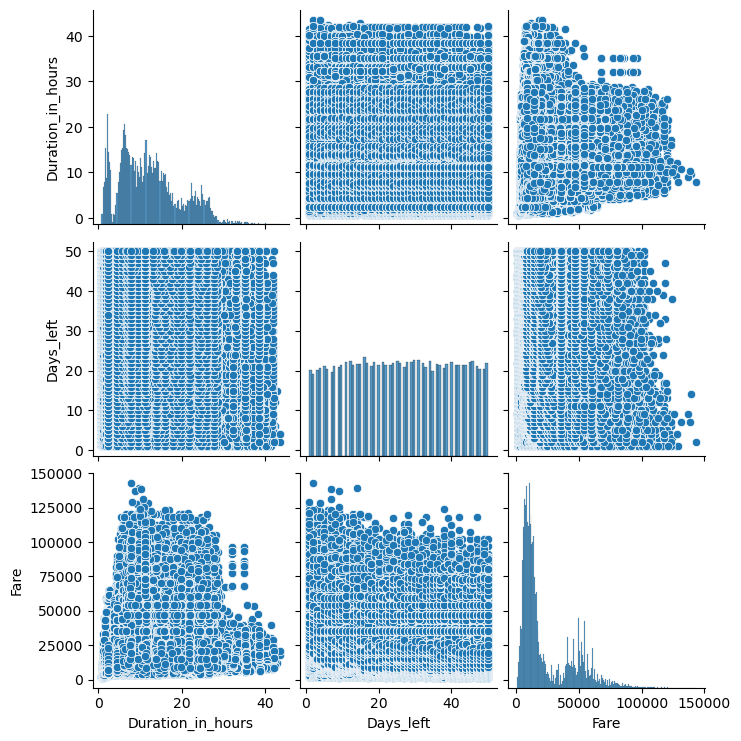

In [11]:
sns.pairplot(df)

Text(0.5, 1.0, 'Airline prices based on the class and company')

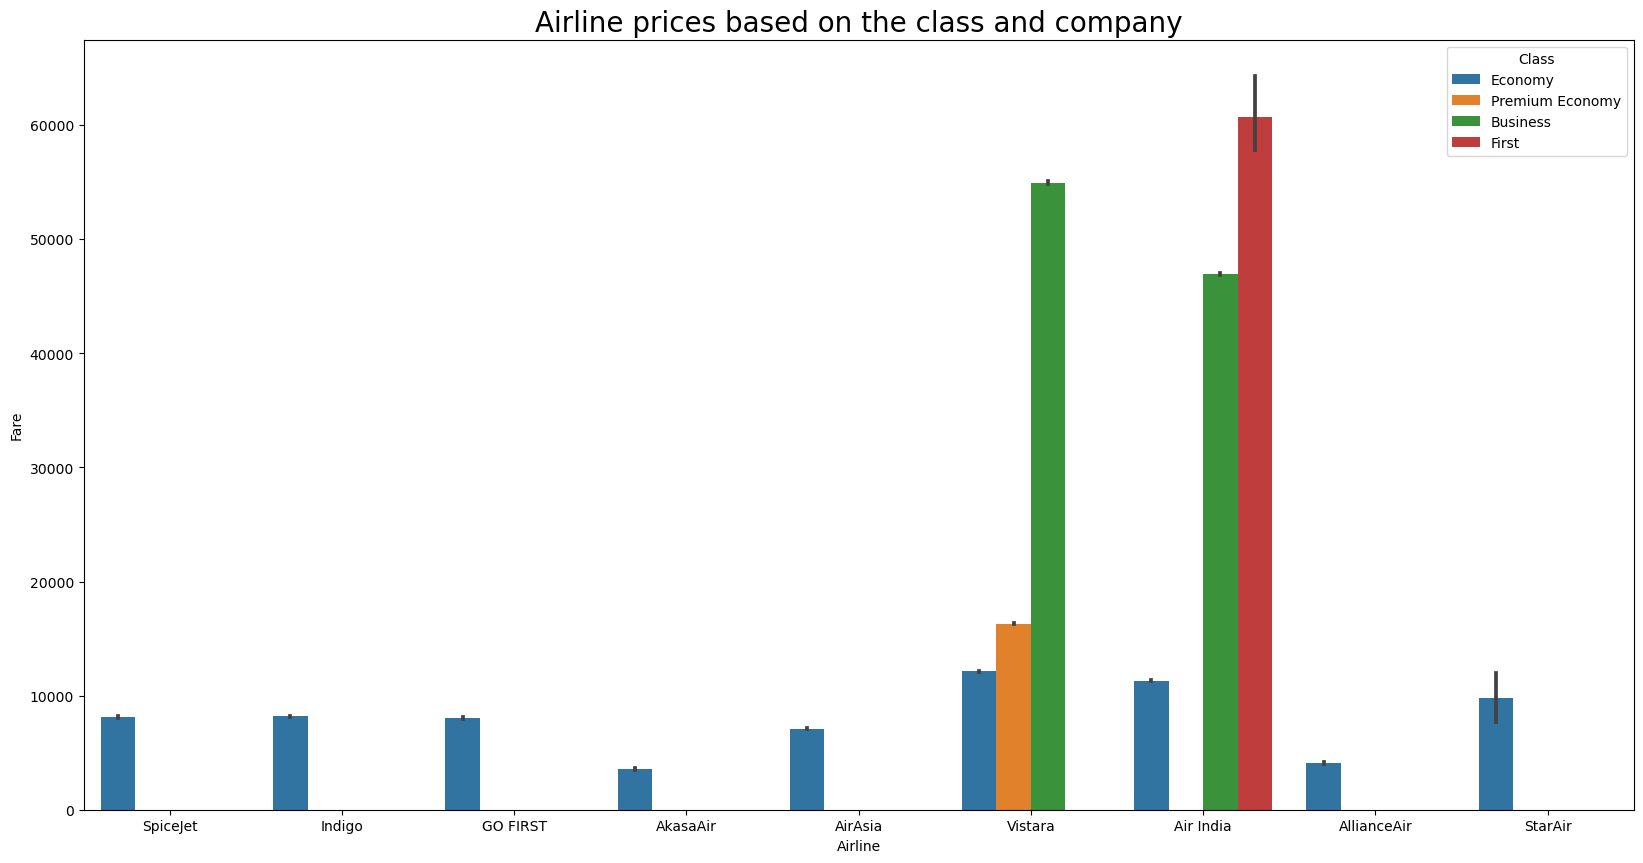

In [12]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Airline',y='Fare',hue="Class",data=df.sort_values("Fare")).set_title('Airline prices based on the class and company',fontsize=20)

In [13]:
# Does price vary with Airlines?

Text(0.5, 1.0, 'Airline prices based on companies for business tickets')

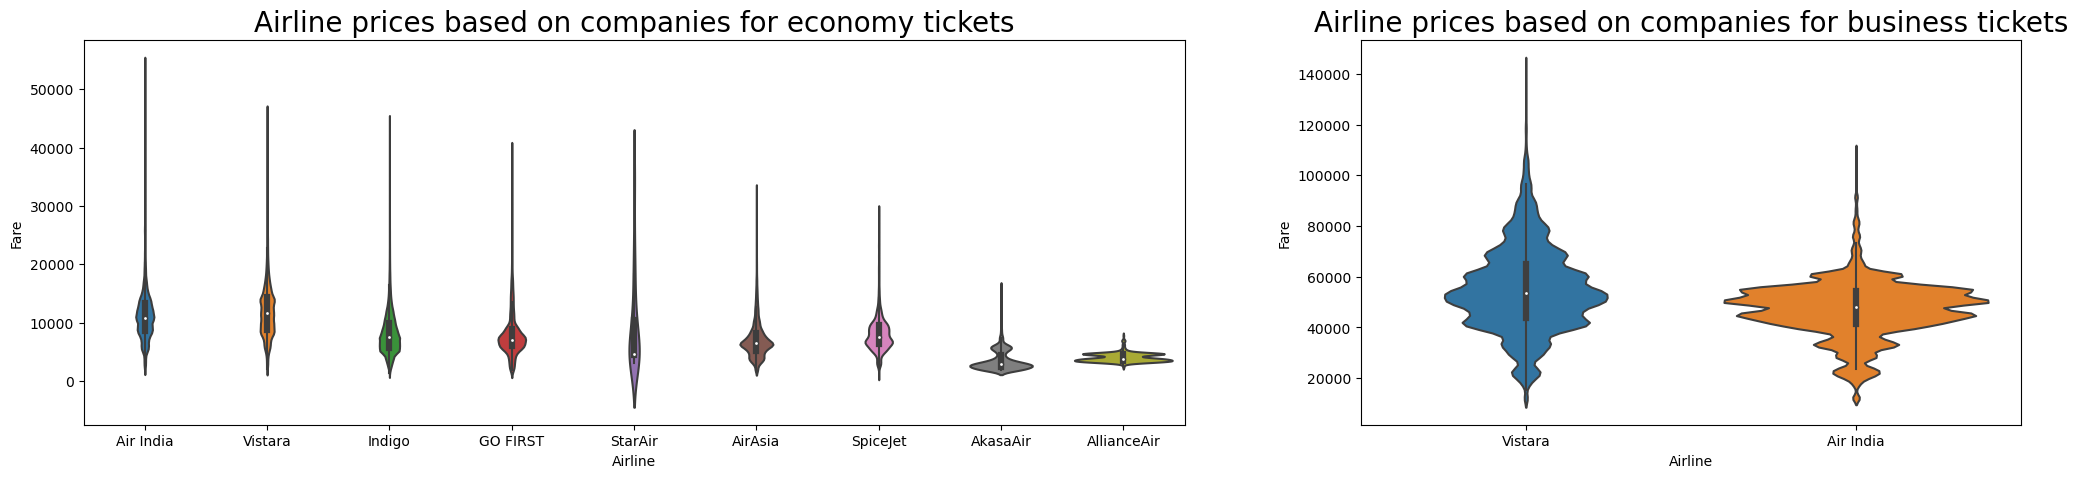

In [14]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.violinplot(y = "Fare", x = "Airline",data = df.loc[df["Class"]=='Economy'].sort_values("Fare", ascending = False), kind="boxen", ax=axs[0])
axs[0].set_title("Airline prices based on companies for economy tickets",fontsize=20)
sns.violinplot(y = "Fare", x = "Airline",data = df.loc[df["Class"]=='Business'].sort_values("Fare", ascending = False), kind="boxen", ax=axs[1])
axs[1].set_title("Airline prices based on companies for business tickets",fontsize=20)

# Prices to days left

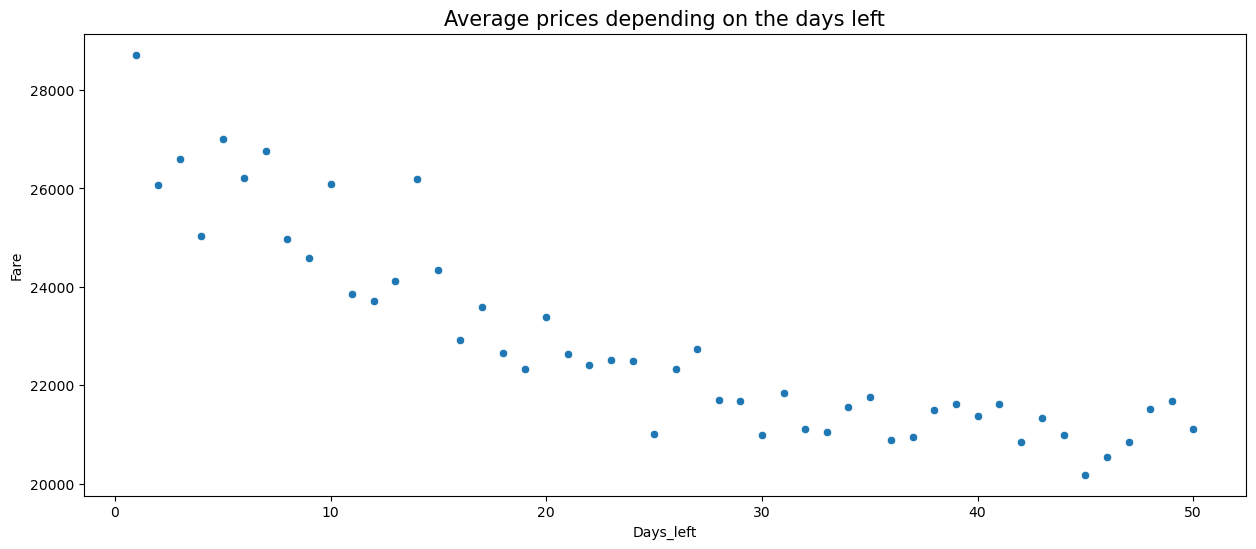

In [15]:
df_temp = df.groupby(['Days_left'])['Fare'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="Days_left", y="Fare", data=df_temp).set_title("Average prices depending on the days left",fontsize=15)

<Axes: xlabel='Days_left', ylabel='Fare'>

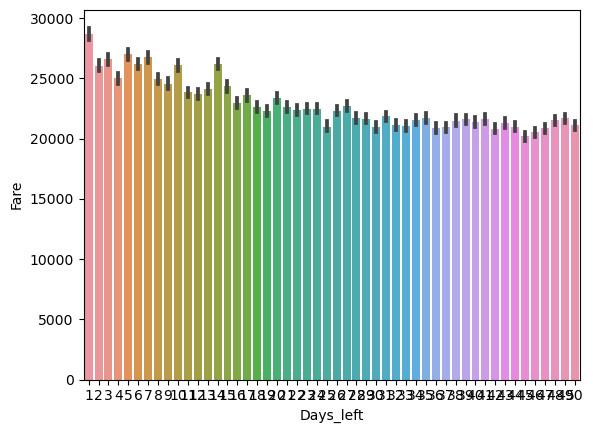

In [16]:
sns.barplot(y='Fare',x='Days_left',data=df)

<Axes: xlabel='Days_left', ylabel='Fare'>

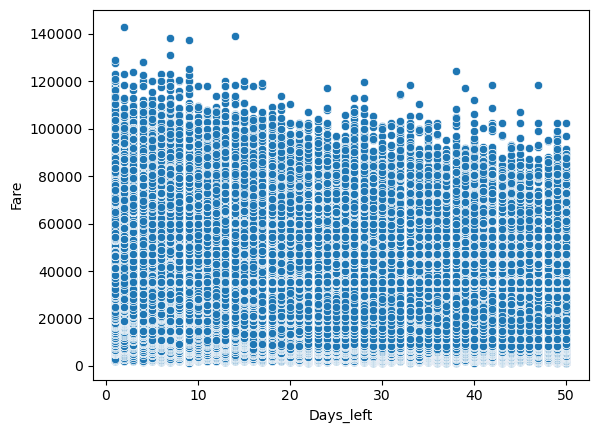

In [17]:
sns.scatterplot(y='Fare',x='Days_left',data=df)

<Axes: xlabel='Date_of_journey', ylabel='Fare'>

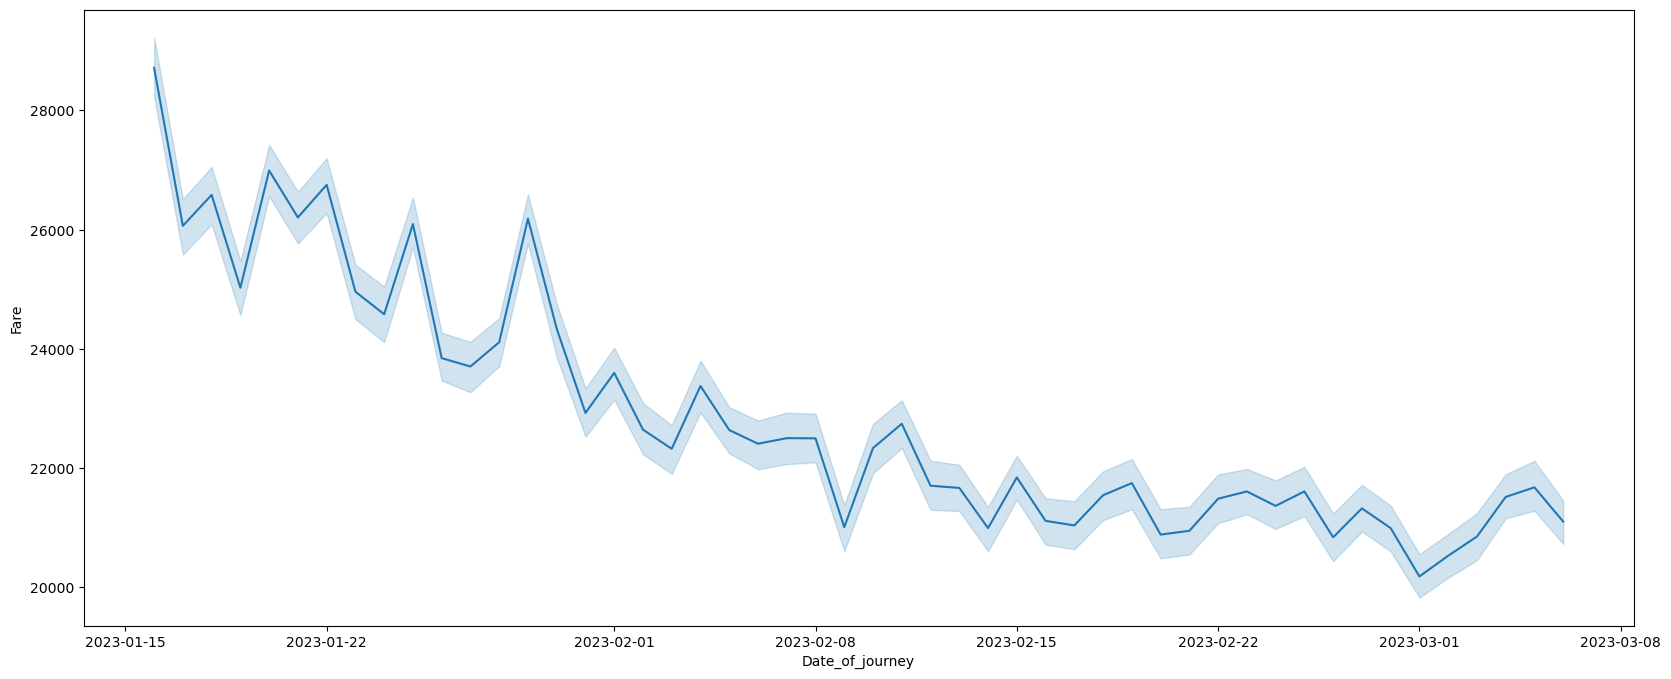

In [18]:
plt.figure(figsize=(20,8))
sns.lineplot(x='Date_of_journey',y='Fare',data=df)

# Flight Timing and Prices

Text(0.5, 1.0, 'Airline prices based on the arrival time')

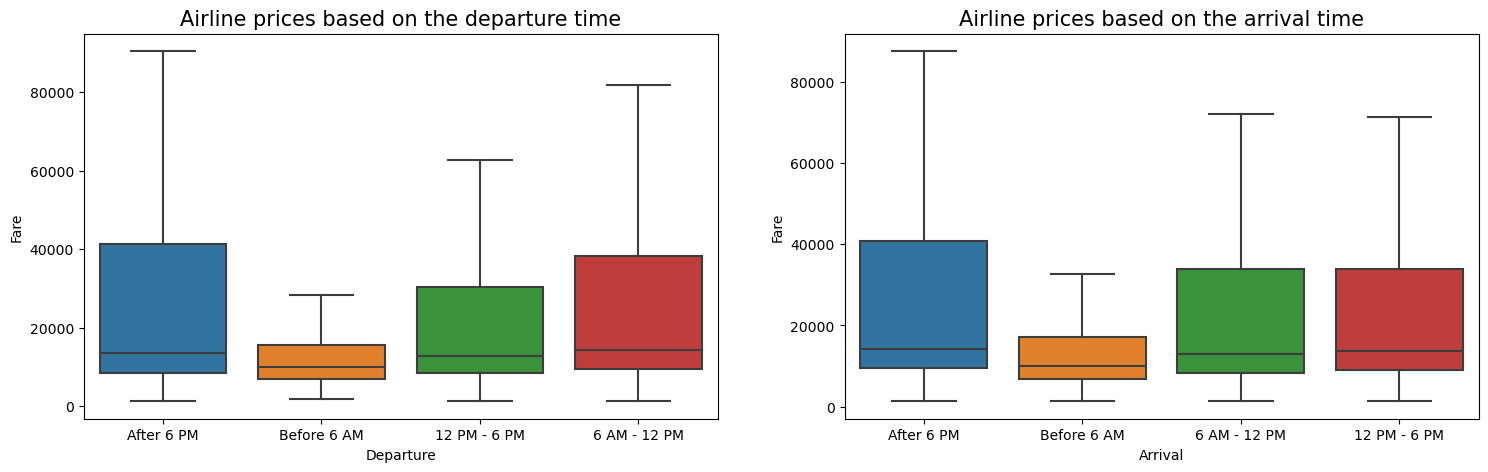

In [19]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="Fare", x="Departure",showfliers=False).set_title("Airline prices based on the departure time",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=df, y="Fare", x="Arrival",showfliers=False).set_title("Airline prices based on the arrival time",fontsize=15)

In [20]:
dummy = pd.get_dummies(df[['Journey_day','Airline','Class','Source','Departure','Total_stops','Arrival','Destination']])

In [21]:
dummy

,Journey_day_Friday,Journey_day_Monday,Journey_day_Saturday,Journey_day_Sunday,Journey_day_Thursday,Journey_day_Tuesday,Journey_day_Wednesday,Airline_Air India,Airline_AirAsia,Airline_AkasaAir,...,Arrival_6 AM - 12 PM,Arrival_After 6 PM,Arrival_Before 6 AM,Destination_Ahmedabad,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452083,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
452084,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
452085,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
452086,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [22]:
df.drop(['Journey_day','Airline','Class','Source','Departure','Total_stops','Arrival','Destination'],axis=1,inplace=True)

In [23]:
df

,Date_of_journey,Duration_in_hours,Days_left,Fare
0,2023-01-16,2.0833,1,5335
1,2023-01-16,2.3333,1,5899
2,2023-01-16,2.1667,1,5801
3,2023-01-16,2.0833,1,5794
4,2023-01-16,2.1667,1,5955
...,...,...,...,...
452083,2023-03-06,13.0833,50,65028
452084,2023-03-06,11.2500,50,69254
452085,2023-03-06,11.2500,50,69254
452086,2023-03-06,11.1667,50,72980


In [24]:
df1=df

In [25]:
df['Journey_Month']= df['Date_of_journey'].dt.strftime('%b')

In [26]:
# sns.scatterplot(y='Fare',x='Days_left',hue='Journey_Month',data=df)

In [27]:
df = pd.concat([df,dummy],axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 50 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Date_of_journey         452088 non-null  datetime64[ns]
 1   Duration_in_hours       452088 non-null  float64       
 2   Days_left               452088 non-null  int64         
 3   Fare                    452088 non-null  int64         
 4   Journey_Month           452088 non-null  object        
 5   Journey_day_Friday      452088 non-null  uint8         
 6   Journey_day_Monday      452088 non-null  uint8         
 7   Journey_day_Saturday    452088 non-null  uint8         
 8   Journey_day_Sunday      452088 non-null  uint8         
 9   Journey_day_Thursday    452088 non-null  uint8         
 10  Journey_day_Tuesday     452088 non-null  uint8         
 11  Journey_day_Wednesday   452088 non-null  uint8         
 12  Airline_Air India       452088

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [30]:
#Case 1: Fare and Date of Journey

In [31]:
df['Date_of_journey_new']=df['Date_of_journey'].apply(lambda x: x.to_pydatetime().toordinal())

In [32]:
from datetime import datetime

In [33]:
# df['Date_of_journey_new2']=datetime.strptime(df['Date_of_journey'],"%Y-%m-%d")

In [34]:
y= df['Fare']

In [35]:
x=df['Date_of_journey_new']

In [36]:
X=sm.add_constant(x)
model=sm.OLS(y,X)
results =model.fit()

In [37]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3516.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:12   Log-Likelihood:            -5.1239e+06
No. Observations:              452088   AIC:                         1.025e+07
Df Residuals:                  452086   BIC:                         1.025e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9.216e+07   1

In [38]:
# plt.figure(figsize=(10, 6))
# plt.plot(df['Date_of_journey_new'], df['Fare'])

# Using ARIMA to Observe

In [39]:
# df2=df1

In [40]:
# df2.set_index('Date_of_journey',inplace=True)

In [41]:
# arima_model = sm.tsa.ARIMA(df2['Fare'], order=(1, 0, 0)).fit()

In [42]:
# forecast_values = arima_model.forecast(steps=3)

In [43]:
# forecast_df = pd.DataFrame(forecast_values, columns=['Fare'], index=pd.date_range(start=df.index[-1], periods=3, closed='right'))

In [44]:
# plt.figure(figsize=(10, 6))
# plt.plot(df2.index, df2['Fare'], label='Original Data')
# plt.plot(forecast_df.index, forecast_df['Fare'], label='Forecasted Values', linestyle='dashed')
# plt.xlabel('Timestamp')
# plt.ylabel('Price')
# plt.title('ARIMA Forecasting')
# plt.legend()
# plt.grid(True)
# plt.show()

# Using SARIMA

In [45]:
# sarima_model = sm.tsa.SARIMAX(df2['Fare'], order=(1, 0, 0), seasonal_order=(1, 1, 1, 7)).fit()

In [46]:
# # Forecast future values
# forecast_values = sarima_model.forecast(steps=3)  # Forecasting 3 steps ahead

# # Create DataFrame for the forecasted values
# forecast_df = pd.DataFrame(forecast_values, columns=['Fare'], index=pd.date_range(start=df2.index[-1], periods=3, freq='D'))

# # Plot the original data and the forecasted values
# plt.figure(figsize=(10, 6))
# plt.plot(df.index, df2['Fare'], label='Original Data')
# plt.plot(forecast_df.index, forecast_df['Fare'], label='Forecasted Values', linestyle='dashed')
# plt.xlabel('Timestamp')
# plt.ylabel('Price')
# plt.title('SARIMA Forecasting')
# plt.legend()
# plt.grid(True)
# plt.show()

# Linear Regression

In [47]:
reg = LinearRegression()

In [48]:
y1= df['Fare']

In [49]:
x1=df['Date_of_journey_new'].values.reshape(-1,1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.33, random_state=42)

In [51]:
reg.fit(X_train,y_train)

LinearRegression()

In [52]:
pred = reg.predict(X_test)

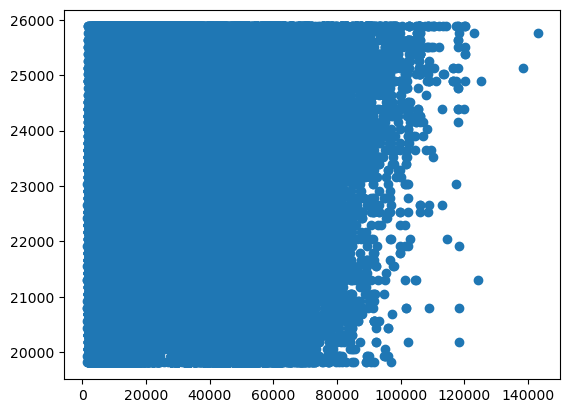

In [53]:
plt.scatter(y_test,pred)

In [54]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 16546.923209144556
MSE: 408696643.1785446
RMSE: 20216.247010227802


# Checking with Days Left and Fare

In [55]:
x2= df2['Days_left'].values.reshape(-1,1)
y2=df2['Fare']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.33, random_state=42)

In [57]:
reg.fit(X_train,y_train)

LinearRegression()

In [58]:
pred = reg.predict(X_test)

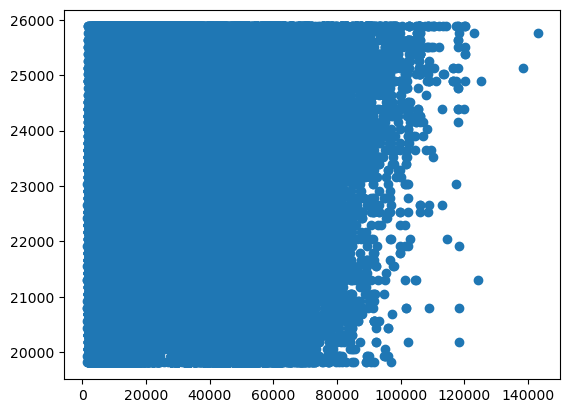

In [59]:
plt.scatter(y_test,pred)

In [60]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 16546.92320914585
MSE: 408696643.17854834
RMSE: 20216.247010227897


# Running all the variables once

In [61]:
y3= df['Fare']
x3= df.drop(['Fare','Date_of_journey','Days_left','Journey_Month'],axis=1)

In [62]:
X = sm.add_constant(x3)

# Fit the model
model = sm.OLS(y3, X)
results = model.fit()

In [63]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:23   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4.38

In [64]:
X = sm.add_constant(x3)
for i in X.columns:
    model=sm.OLS(y3,X[i])
    result=model.fit()
    print(f"Summary for {i}:\n{results.summary()}\n")

Summary for const:
                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:23   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const    

Summary for Journey_day_Friday:
                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:23   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

Summary for Journey_day_Saturday:
                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:23   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

Summary for Journey_day_Thursday:
                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:24   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

Summary for Journey_day_Wednesday:
                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:24   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

Summary for Airline_AirAsia:
                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:24   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

Summary for Airline_AllianceAir:
                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:25   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

Summary for Airline_Indigo:
                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:25   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------


Summary for Airline_StarAir:
                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:25   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

Summary for Class_Business:
                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:26   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------


Summary for Class_First:
                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:26   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
con

Summary for Source_Ahmedabad:
                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:26   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Summary for Source_Chennai:
                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:26   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------


Summary for Source_Hyderabad:
                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:27   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Summary for Source_Mumbai:
                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:27   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
c

Summary for Departure_6 AM - 12 PM:
                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:27   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

Summary for Departure_Before 6 AM:
                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:28   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

Summary for Total_stops_2+-stop:
                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:28   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

Summary for Arrival_12 PM - 6 PM:
                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:28   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

Summary for Arrival_After 6 PM:
                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:28   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

Summary for Destination_Ahmedabad:
                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:29   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

Summary for Destination_Chennai:
                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:29   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

Summary for Destination_Hyderabad:
                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:29   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

Summary for Destination_Mumbai:
                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:30   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

# Now selecting few of the variables and running one by one

In [65]:
# Journey Days in first Case

In [66]:
y4= df['Fare']
x4= df[['Date_of_journey_new','Journey_day_Sunday','Journey_day_Monday','Journey_day_Tuesday','Journey_day_Wednesday','Journey_day_Thursday','Journey_day_Friday','Journey_day_Saturday']]

In [67]:
X = sm.add_constant(x4)

# Fit the model
model = sm.OLS(y4, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     528.8
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:30   Log-Likelihood:            -5.1238e+06
No. Observations:              452088   AIC:                         1.025e+07
Df Residuals:                  452080   BIC:                         1.025e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  8.192e+

In [68]:
X_train, X_test, y_train, y_test = train_test_split(x4, y4, test_size=0.33, random_state=42)

In [69]:
reg.fit(X_train,y_train)

LinearRegression()

In [70]:
pred=reg.predict(X_test)

In [71]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 16542.826811867417
MSE: 408570344.89731425
RMSE: 20213.123086186217


In [72]:
# Scaling the Independent Variable

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()

In [75]:
X_train=scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [76]:
reg.fit(X_train,y_train)

LinearRegression()

In [77]:
pred=reg.predict(X_test)

In [78]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 839178025690.9407
MSE: 1.085801927078069e+24
RMSE: 1042018199014.8104


In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 16543.093490683023
MSE: 408580623.0747959
RMSE: 20213.37732974863


In [80]:
# Removing date of Journet and compute

In [81]:
y5= df['Fare']
x5= df[['Journey_day_Sunday','Journey_day_Monday','Journey_day_Tuesday','Journey_day_Wednesday','Journey_day_Thursday','Journey_day_Friday','Journey_day_Saturday']]

In [82]:
X = sm.add_constant(x5)

# Fit the model
model = sm.OLS(y5, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     15.26
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           4.22e-20
Time:                        19:13:32   Log-Likelihood:            -5.1256e+06
No. Observations:              452088   AIC:                         1.025e+07
Df Residuals:                  452080   BIC:                         1.025e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.151e+

In [83]:
#  NO particular signifance

In [84]:
X_train, X_test, y_train, y_test = train_test_split(x5, y5, test_size=0.33, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 16606.58366145938
MSE: 411896972.57036954
RMSE: 20295.24507293197


In [85]:
# removing date of Journey and compute

In [86]:
y6= df['Fare']
x6= df.drop(['Fare','Date_of_journey','Date_of_journey_new','Journey_Month'],axis=1)

In [87]:
X = sm.add_constant(x6)

# Fit the model
model = sm.OLS(y6, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:34   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.52

In [88]:
# Removed Arline Air India and Destination Ahmedabad

In [89]:
y7= df['Fare']
x7= df.drop(['Fare','Date_of_journey','Date_of_journey_new','Journey_Month','Airline_Air India','Destination_Ahmedabad'],axis=1)
X = sm.add_constant(x7)

# Fit the model
model = sm.OLS(y7, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 6.776e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:13:37   Log-Likelihood:            -4.6908e+06
No. Observations:              452088   AIC:                         9.382e+06
Df Residuals:                  452048   BIC:                         9.382e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -9.6

In [90]:
X_train, X_test, y_train, y_test = train_test_split(x7, y7, test_size=0.33, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 5126.444480193042
MSE: 60084736.6044507
RMSE: 7751.434486883747


In [91]:
#We observe a significant decrease in RMSE and MSE

In [92]:
# plt.scatter(y_test,pred)
# sns.distplot((y_test-pred),bins=100);

<Axes: xlabel='Duration_in_hours', ylabel='Fare'>

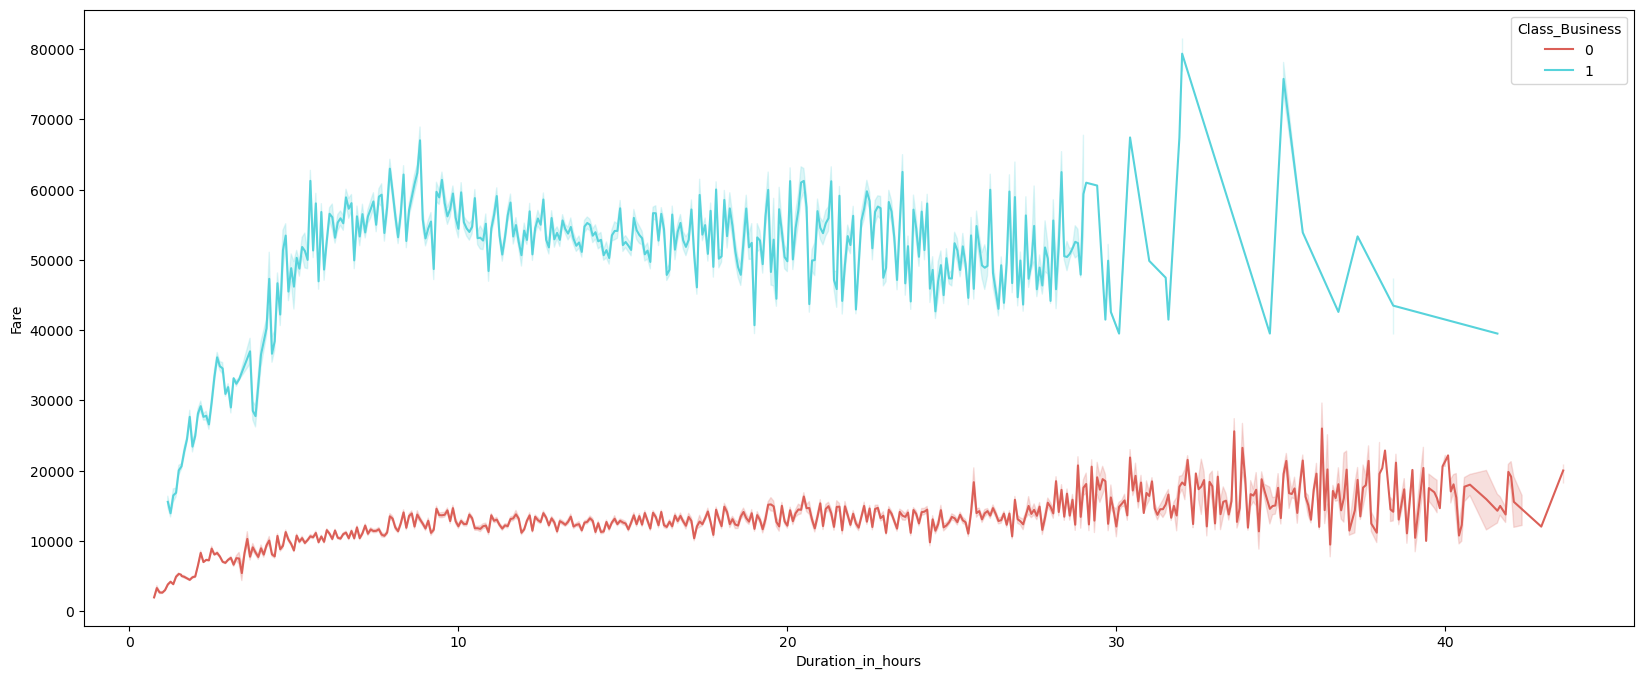

In [93]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='Duration_in_hours',y='Fare',hue='Class_Business',palette='hls')

In [94]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [95]:
y8= df['Fare']
x8= df.drop(['Fare','Date_of_journey','Date_of_journey_new','Journey_Month'],axis=1)

# ----------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(x8, y8, test_size=0.33, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 5122.9574234198
MSE: 60095263.9257725
RMSE: 7752.113513473117


In [96]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(X_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(X_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 5122.957
Mean Squared Error (MSE): 60095263.926
Root Mean Squared Error (RMSE): 7752.114
R2_score: 0.854132
Root Mean Squared Log Error (RMSLE): 8.956
Mean Absolute Percentage Error (MAPE): 32.31 %
Adj R Square:  0.854086
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\3489303594.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 2541.561
Mean Squared Error (MSE): 34351943.633
Root Mean Squared Error (RMSE): 5861.053
R2_score: 0.916618
Root Mean Squared Log Error (RMSLE): 8.676
Mean Absolute Percentage Error (MAPE): 11.67 %
Adj R Square:  0.916592
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\3489303594.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 2133.127
Mean Squared Error (MSE): 18925490.318
Root Mean Squared Error (RMSE): 4350.344
R2_score: 0.954063
Root Mean Squared Log Error (RMSLE): 8.378
Mean Absolute Percentage Error (MAPE): 9.99 %
Adj R Square:  0.954049
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\3489303594.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  KNeighborsRegressor()
Mean Absolute Error (MAE): 3257.954
Mean Squared Error (MSE): 34424680.742
Root Mean Squared Error (RMSE): 5867.255
R2_score: 0.916442
Root Mean Squared Log Error (RMSLE): 8.677
Mean Absolute Percentage Error (MAPE): 16.6 %
Adj R Square:  0.916416
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\3489303594.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  ExtraTreesRegressor()
Mean Absolute Error (MAE): 2398.682
Mean Squared Error (MSE): 25837696.637
Root Mean Squared Error (RMSE): 5083.079
R2_score: 0.937285
Root Mean Squared Log Error (RMSLE): 8.534
Mean Absolute Percentage Error (MAPE): 11.36 %
Adj R Square:  0.937265
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\3489303594.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  GradientBoostingRegressor()
Mean Absolute Error (MAE): 4000.346
Mean Squared Error (MSE): 41979286.892
Root Mean Squared Error (RMSE): 6479.142
R2_score: 0.898105
Root Mean Squared Log Error (RMSLE): 8.776
Mean Absolute Percentage Error (MAPE): 21.78 %
Adj R Square:  0.898073
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\3489303594.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Mean Absolute Error (MAE): 3042.7
Mean Squared Error (MSE): 26420377.483
Root Mean Squared Error (RMSE): 5140.076
R2_score: 0.93587
Root Mean Squared Log Error (RMSLE): 8.545
Mean Absolute Percentage Error (MAPE): 15.82 %
Adj R Square:  0.93585
-

C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\3489303594.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  BaggingRegressor()
Mean Absolute Error (MAE): 2218.131
Mean Squared Error (MSE): 20541513.741
Root Mean Squared Error (RMSE): 4532.275
R2_score: 0.95014
Root Mean Squared Log Error (RMSLE): 8.419
Mean Absolute Percentage Error (MAPE): 10.43 %
Adj R Square:  0.950124
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\3489303594.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  Ridge()
Mean Absolute Error (MAE): 5126.857
Mean Squared Error (MSE): 60085789.766
Root Mean Squared Error (RMSE): 7751.502
R2_score: 0.854155
Root Mean Squared Log Error (RMSLE): 8.956
Mean Absolute Percentage Error (MAPE): 32.38 %
Adj R Square:  0.854109
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\3489303594.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  Lasso(alpha=0.1)
Mean Absolute Error (MAE): 5126.706
Mean Squared Error (MSE): 60086014.52
Root Mean Squared Error (RMSE): 7751.517
R2_score: 0.854155
Root Mean Squared Log Error (RMSLE): 8.956
Mean Absolute Percentage Error (MAPE): 32.38 %
Adj R Square:  0.854109
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.337e+12, tolerance: 1.250e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\3489303594.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


 # Making Controlled Inputs


# Observe the relationship by Considering The Classes:
## Considering the Economy Class

## Checking the Individual Impact

In [97]:
df_Economy=df[df['Class_Economy']==1]

In [98]:
df_Economy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252033 entries, 0 to 452017
Data columns (total 51 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Date_of_journey         252033 non-null  datetime64[ns]
 1   Duration_in_hours       252033 non-null  float64       
 2   Days_left               252033 non-null  int64         
 3   Fare                    252033 non-null  int64         
 4   Journey_Month           252033 non-null  object        
 5   Journey_day_Friday      252033 non-null  uint8         
 6   Journey_day_Monday      252033 non-null  uint8         
 7   Journey_day_Saturday    252033 non-null  uint8         
 8   Journey_day_Sunday      252033 non-null  uint8         
 9   Journey_day_Thursday    252033 non-null  uint8         
 10  Journey_day_Tuesday     252033 non-null  uint8         
 11  Journey_day_Wednesday   252033 non-null  uint8         
 12  Airline_Air India       252033

In [99]:
df_Economy.drop(['Class_Business','Class_First','Class_Premium Economy'],axis=1,inplace = True)

C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\645030306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Economy.drop(['Class_Business','Class_First','Class_Premium Economy'],axis=1,inplace = True)


In [100]:
df_Economy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252033 entries, 0 to 452017
Data columns (total 48 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Date_of_journey         252033 non-null  datetime64[ns]
 1   Duration_in_hours       252033 non-null  float64       
 2   Days_left               252033 non-null  int64         
 3   Fare                    252033 non-null  int64         
 4   Journey_Month           252033 non-null  object        
 5   Journey_day_Friday      252033 non-null  uint8         
 6   Journey_day_Monday      252033 non-null  uint8         
 7   Journey_day_Saturday    252033 non-null  uint8         
 8   Journey_day_Sunday      252033 non-null  uint8         
 9   Journey_day_Thursday    252033 non-null  uint8         
 10  Journey_day_Tuesday     252033 non-null  uint8         
 11  Journey_day_Wednesday   252033 non-null  uint8         
 12  Airline_Air India       252033

In [101]:
import statsmodels.api as sm

# Individual testing of Independent Vars with Dependent Vars.

In [102]:
y9= df_Economy['Fare']
# x10= df.drop(['Fare','Date_of_journey','Date_of_journey_new','Journey_Month'],axis=1)
x9=df_Economy[['Duration_in_hours','Days_left','Journey_day_Friday',
                'Journey_day_Monday','Journey_day_Saturday','Journey_day_Sunday',
                'Journey_day_Thursday','Journey_day_Tuesday','Journey_day_Wednesday',
                'Airline_Air India','Airline_AirAsia','Airline_AkasaAir',
                'Airline_AllianceAir','Airline_GO FIRST',
                'Airline_Indigo','Airline_SpiceJet','Airline_StarAir','Airline_Vistara',
                'Class_Economy',
                'Source_Ahmedabad','Source_Bangalore','Source_Chennai','Source_Delhi',
                'Source_Hyderabad','Source_Kolkata','Source_Mumbai','Departure_12 PM - 6 PM',
                'Departure_6 AM - 12 PM','Departure_After 6 PM','Departure_Before 6 AM',
                'Total_stops_1-stop','Total_stops_2+-stop','Total_stops_non-stop',
                'Arrival_12 PM - 6 PM','Arrival_6 AM - 12 PM','Arrival_After 6 PM',
                'Arrival_Before 6 AM','Destination_Ahmedabad','Destination_Bangalore',
                'Destination_Chennai','Destination_Delhi','Destination_Hyderabad',
                'Destination_Kolkata','Destination_Mumbai']]
X=sm.add_constant(x9)
for i in X.columns:
    models = sm.OLS(y9,X[i])
    results = models.fit()
    print(f"Summary for {i}:\n{results.summary()}\n")
    

Summary for Duration_in_hours:
                                 OLS Regression Results                                
Dep. Variable:                   Fare   R-squared (uncentered):                   0.699
Model:                            OLS   Adj. R-squared (uncentered):              0.699
Method:                 Least Squares   F-statistic:                          5.865e+05
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        19:40:21   Log-Likelihood:                     -2.5557e+06
No. Observations:              252033   AIC:                                  5.111e+06
Df Residuals:                  252032   BIC:                                  5.111e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
---

Summary for Journey_day_Sunday:
                                 OLS Regression Results                                
Dep. Variable:                   Fare   R-squared (uncentered):                   0.126
Model:                            OLS   Adj. R-squared (uncentered):              0.126
Method:                 Least Squares   F-statistic:                          3.620e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        19:40:21   Log-Likelihood:                     -2.6902e+06
No. Observations:              252033   AIC:                                  5.380e+06
Df Residuals:                  252032   BIC:                                  5.380e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
-

Summary for Airline_AirAsia:
                                 OLS Regression Results                                
Dep. Variable:                   Fare   R-squared (uncentered):                   0.025
Model:                            OLS   Adj. R-squared (uncentered):              0.025
Method:                 Least Squares   F-statistic:                              6502.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        19:40:21   Log-Likelihood:                     -2.7039e+06
No. Observations:              252033   AIC:                                  5.408e+06
Df Residuals:                  252032   BIC:                                  5.408e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
-------

Summary for Airline_SpiceJet:
                                 OLS Regression Results                                
Dep. Variable:                   Fare   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):              0.012
Method:                 Least Squares   F-statistic:                              3121.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        19:40:22   Log-Likelihood:                     -2.7056e+06
No. Observations:              252033   AIC:                                  5.411e+06
Df Residuals:                  252032   BIC:                                  5.411e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----

Summary for Source_Hyderabad:
                                 OLS Regression Results                                
Dep. Variable:                   Fare   R-squared (uncentered):                   0.098
Model:                            OLS   Adj. R-squared (uncentered):              0.098
Method:                 Least Squares   F-statistic:                          2.745e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        19:40:22   Log-Likelihood:                     -2.6941e+06
No. Observations:              252033   AIC:                                  5.388e+06
Df Residuals:                  252032   BIC:                                  5.388e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----

Summary for Total_stops_1-stop:
                                 OLS Regression Results                                
Dep. Variable:                   Fare   R-squared (uncentered):                   0.721
Model:                            OLS   Adj. R-squared (uncentered):              0.721
Method:                 Least Squares   F-statistic:                          6.516e+05
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        19:40:23   Log-Likelihood:                     -2.5462e+06
No. Observations:              252033   AIC:                                  5.092e+06
Df Residuals:                  252032   BIC:                                  5.092e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
-

Summary for Destination_Ahmedabad:
                                 OLS Regression Results                                
Dep. Variable:                   Fare   R-squared (uncentered):                   0.073
Model:                            OLS   Adj. R-squared (uncentered):              0.073
Method:                 Least Squares   F-statistic:                          1.996e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        19:40:23   Log-Likelihood:                     -2.6975e+06
No. Observations:              252033   AIC:                                  5.395e+06
Df Residuals:                  252032   BIC:                                  5.395e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.

## Combine Model Run

In [103]:
y9= df_Economy['Fare']
x9=df_Economy.drop(['Fare','Date_of_journey','Date_of_journey_new','Journey_Month'],axis=1)
X=sm.add_constant(x9)
models = sm.OLS(y9,X)
result=models.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     6168.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:40:24   Log-Likelihood:            -2.4021e+06
No. Observations:              252033   AIC:                         4.804e+06
Df Residuals:                  251996   BIC:                         4.805e+06
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Duration_in_hours        -11

In [104]:
#  RUnning Classification Models

In [105]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(x9, y9, test_size=0.33, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(X_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(X_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)

MAE: 2418.344615310625
MSE: 11082742.358995322
RMSE: 3329.0753008899214
Model Name:  LinearRegression()
Mean Absolute Error (MAE): 2418.345
Mean Squared Error (MSE): 11082742.359
Root Mean Squared Error (RMSE): 3329.075
R2_score: 0.469573
Root Mean Squared Log Error (RMSLE): 8.11
Mean Absolute Percentage Error (MAPE): 27.54 %
Adj R Square:  0.469292
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\483530651.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1644.881
Mean Squared Error (MSE): 9494990.663
Root Mean Squared Error (RMSE): 3081.394
R2_score: 0.545564
Root Mean Squared Log Error (RMSLE): 8.033
Mean Absolute Percentage Error (MAPE): 16.25 %
Adj R Square:  0.545323
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\483530651.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1346.416
Mean Squared Error (MSE): 5427272.294
Root Mean Squared Error (RMSE): 2329.651
R2_score: 0.740247
Root Mean Squared Log Error (RMSLE): 7.753
Mean Absolute Percentage Error (MAPE): 13.57 %
Adj R Square:  0.74011
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\483530651.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  KNeighborsRegressor()
Mean Absolute Error (MAE): 1699.486
Mean Squared Error (MSE): 7280112.294
Root Mean Squared Error (RMSE): 2698.168
R2_score: 0.651569
Root Mean Squared Log Error (RMSLE): 7.9
Mean Absolute Percentage Error (MAPE): 17.34 %
Adj R Square:  0.651385
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\483530651.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  ExtraTreesRegressor()
Mean Absolute Error (MAE): 1386.33
Mean Squared Error (MSE): 6307714.99
Root Mean Squared Error (RMSE): 2511.516
R2_score: 0.698109
Root Mean Squared Log Error (RMSLE): 7.829
Mean Absolute Percentage Error (MAPE): 13.79 %
Adj R Square:  0.697949
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\483530651.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  GradientBoostingRegressor()
Mean Absolute Error (MAE): 2082.087
Mean Squared Error (MSE): 8719951.77
Root Mean Squared Error (RMSE): 2952.956
R2_score: 0.582658
Root Mean Squared Log Error (RMSLE): 7.991
Mean Absolute Percentage Error (MAPE): 22.66 %
Adj R Square:  0.582437
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\483530651.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Mean Absolute Error (MAE): 1670.444
Mean Squared Error (MSE): 6177706.516
Root Mean Squared Error (RMSE): 2485.499
R2_score: 0.704331
Root Mean Squared Log Error (RMSLE): 7.818
Mean Absolute Percentage Error (MAPE): 17.43 %
Adj R Square:  0.70417

C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\483530651.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  BaggingRegressor()
Mean Absolute Error (MAE): 1402.271
Mean Squared Error (MSE): 5875063.633
Root Mean Squared Error (RMSE): 2423.853
R2_score: 0.718816
Root Mean Squared Log Error (RMSLE): 7.793
Mean Absolute Percentage Error (MAPE): 14.1 %
Adj R Square:  0.718667
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\483530651.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  Ridge()
Mean Absolute Error (MAE): 2418.09
Mean Squared Error (MSE): 11082543.874
Root Mean Squared Error (RMSE): 3329.045
R2_score: 0.469583
Root Mean Squared Log Error (RMSLE): 8.11
Mean Absolute Percentage Error (MAPE): 27.54 %
Adj R Square:  0.469302
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\483530651.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  Lasso(alpha=0.1)
Mean Absolute Error (MAE): 2417.909
Mean Squared Error (MSE): 11082397.838
Root Mean Squared Error (RMSE): 3329.024
R2_score: 0.46959
Root Mean Squared Log Error (RMSLE): 8.11
Mean Absolute Percentage Error (MAPE): 27.53 %
Adj R Square:  0.469309
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.535e+11, tolerance: 3.533e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\483530651.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


# Class Economy and Flight: Indigo

In [106]:
df_Economy_Indigo=df_Economy[df_Economy['Airline_Indigo']==1]

In [107]:
df_Economy_Indigo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65659 entries, 1 to 452017
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date_of_journey         65659 non-null  datetime64[ns]
 1   Duration_in_hours       65659 non-null  float64       
 2   Days_left               65659 non-null  int64         
 3   Fare                    65659 non-null  int64         
 4   Journey_Month           65659 non-null  object        
 5   Journey_day_Friday      65659 non-null  uint8         
 6   Journey_day_Monday      65659 non-null  uint8         
 7   Journey_day_Saturday    65659 non-null  uint8         
 8   Journey_day_Sunday      65659 non-null  uint8         
 9   Journey_day_Thursday    65659 non-null  uint8         
 10  Journey_day_Tuesday     65659 non-null  uint8         
 11  Journey_day_Wednesday   65659 non-null  uint8         
 12  Airline_Air India       65659 non-null  uint8

In [108]:
y10=df_Economy_Indigo['Fare']
x10 = df_Economy_Indigo.drop(['Date_of_journey_new','Fare','Journey_Month','Date_of_journey'],axis=1)
# x10 = df_Economy_Indigo.drop('Date_of_journey',axis=1)
# x10 = df_Economy_Indigo.drop('Journey_Month',axis=1)

In [109]:
x10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65659 entries, 1 to 452017
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Duration_in_hours       65659 non-null  float64
 1   Days_left               65659 non-null  int64  
 2   Journey_day_Friday      65659 non-null  uint8  
 3   Journey_day_Monday      65659 non-null  uint8  
 4   Journey_day_Saturday    65659 non-null  uint8  
 5   Journey_day_Sunday      65659 non-null  uint8  
 6   Journey_day_Thursday    65659 non-null  uint8  
 7   Journey_day_Tuesday     65659 non-null  uint8  
 8   Journey_day_Wednesday   65659 non-null  uint8  
 9   Airline_Air India       65659 non-null  uint8  
 10  Airline_AirAsia         65659 non-null  uint8  
 11  Airline_AkasaAir        65659 non-null  uint8  
 12  Airline_AllianceAir     65659 non-null  uint8  
 13  Airline_GO FIRST        65659 non-null  uint8  
 14  Airline_Indigo          65659 non-nul

In [110]:
X= sm.add_constant(x10)
for i in X.columns:
    models= sm.OLS(y10,X[i])
    results= models.fit()
    print(f"Summary for {i}:\n{results.summary()}\n")

Summary for Duration_in_hours:
                                 OLS Regression Results                                
Dep. Variable:                   Fare   R-squared (uncentered):                   0.816
Model:                            OLS   Adj. R-squared (uncentered):              0.816
Method:                 Least Squares   F-statistic:                          2.921e+05
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        19:52:45   Log-Likelihood:                     -6.3493e+05
No. Observations:               65659   AIC:                                  1.270e+06
Df Residuals:                   65658   BIC:                                  1.270e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
---

Summary for Journey_day_Thursday:
                                 OLS Regression Results                                
Dep. Variable:                   Fare   R-squared (uncentered):                   0.115
Model:                            OLS   Adj. R-squared (uncentered):              0.115
Method:                 Least Squares   F-statistic:                              8500.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        19:52:45   Log-Likelihood:                     -6.8660e+05
No. Observations:               65659   AIC:                                  1.373e+06
Df Residuals:                   65658   BIC:                                  1.373e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.97

Summary for Airline_GO FIRST:
                                 OLS Regression Results                                
Dep. Variable:                   Fare   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                                nan
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                         nan
Time:                        19:52:45   Log-Likelihood:                     -6.9060e+05
No. Observations:               65659   AIC:                                  1.381e+06
Df Residuals:                   65659   BIC:                                  1.381e+06
Df Model:                           0                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----

C:\Users\abhi9\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\abhi9\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\abhi9\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\abhi9\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\abhi9\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\abhi9\anaconda3\lib\site-packages\statsmodels\

Summary for Airline_StarAir:
                                 OLS Regression Results                                
Dep. Variable:                   Fare   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                                nan
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                         nan
Time:                        19:52:45   Log-Likelihood:                     -6.9060e+05
No. Observations:               65659   AIC:                                  1.381e+06
Df Residuals:                   65659   BIC:                                  1.381e+06
Df Model:                           0                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
-------

Summary for Source_Kolkata:
                                 OLS Regression Results                                
Dep. Variable:                   Fare   R-squared (uncentered):                   0.205
Model:                            OLS   Adj. R-squared (uncentered):              0.205
Method:                 Least Squares   F-statistic:                          1.689e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        19:52:46   Log-Likelihood:                     -6.8308e+05
No. Observations:               65659   AIC:                                  1.366e+06
Df Residuals:                   65658   BIC:                                  1.366e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
---------

Summary for Total_stops_1-stop:
                                 OLS Regression Results                                
Dep. Variable:                   Fare   R-squared (uncentered):                   0.751
Model:                            OLS   Adj. R-squared (uncentered):              0.751
Method:                 Least Squares   F-statistic:                          1.976e+05
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        19:52:46   Log-Likelihood:                     -6.4501e+05
No. Observations:               65659   AIC:                                  1.290e+06
Df Residuals:                   65658   BIC:                                  1.290e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
-

Summary for Arrival_After 6 PM:
                                 OLS Regression Results                                
Dep. Variable:                   Fare   R-squared (uncentered):                   0.326
Model:                            OLS   Adj. R-squared (uncentered):              0.326
Method:                 Least Squares   F-statistic:                          3.172e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        19:52:46   Log-Likelihood:                     -6.7766e+05
No. Observations:               65659   AIC:                                  1.355e+06
Df Residuals:                   65658   BIC:                                  1.355e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
-

Summary for Destination_Delhi:
                                 OLS Regression Results                                
Dep. Variable:                   Fare   R-squared (uncentered):                   0.154
Model:                            OLS   Adj. R-squared (uncentered):              0.154
Method:                 Least Squares   F-statistic:                          1.195e+04
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        19:52:46   Log-Likelihood:                     -6.8511e+05
No. Observations:               65659   AIC:                                  1.370e+06
Df Residuals:                   65658   BIC:                                  1.370e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
---

In [111]:
models=sm.OLS(y10,X)
result=models.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     1691.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:52:46   Log-Likelihood:            -6.1263e+05
No. Observations:               65659   AIC:                         1.225e+06
Df Residuals:                   65630   BIC:                         1.226e+06
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Duration_in_hours        -19

In [112]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(x10, y10, test_size=0.33, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(X_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(X_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)

MAE: 1953.531151929112
MSE: 7576717.943926527
RMSE: 2752.5838668288616
Model Name:  LinearRegression()
Mean Absolute Error (MAE): 1953.531
Mean Squared Error (MSE): 7576717.944
Root Mean Squared Error (RMSE): 2752.584
R2_score: 0.411396
Root Mean Squared Log Error (RMSLE): 7.92
Mean Absolute Percentage Error (MAPE): 26.07 %
Adj R Square:  0.410198
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\1325364948.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1532.283
Mean Squared Error (MSE): 7439380.397
Root Mean Squared Error (RMSE): 2727.523
R2_score: 0.422066
Root Mean Squared Log Error (RMSLE): 7.911
Mean Absolute Percentage Error (MAPE): 17.6 %
Adj R Square:  0.42089
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\1325364948.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1237.102
Mean Squared Error (MSE): 4349018.363
Root Mean Squared Error (RMSE): 2085.43
R2_score: 0.662143
Root Mean Squared Log Error (RMSLE): 7.643
Mean Absolute Percentage Error (MAPE): 14.58 %
Adj R Square:  0.661456
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\1325364948.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  KNeighborsRegressor()
Mean Absolute Error (MAE): 1596.873
Mean Squared Error (MSE): 6067853.29
Root Mean Squared Error (RMSE): 2463.301
R2_score: 0.528614
Root Mean Squared Log Error (RMSLE): 7.809
Mean Absolute Percentage Error (MAPE): 19.19 %
Adj R Square:  0.527655
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\1325364948.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  ExtraTreesRegressor()
Mean Absolute Error (MAE): 1463.52
Mean Squared Error (MSE): 6105739.744
Root Mean Squared Error (RMSE): 2470.98
R2_score: 0.525671
Root Mean Squared Log Error (RMSLE): 7.812
Mean Absolute Percentage Error (MAPE): 17.02 %
Adj R Square:  0.524706
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\1325364948.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  GradientBoostingRegressor()
Mean Absolute Error (MAE): 1664.418
Mean Squared Error (MSE): 6092673.756
Root Mean Squared Error (RMSE): 2468.334
R2_score: 0.526686
Root Mean Squared Log Error (RMSLE): 7.811
Mean Absolute Percentage Error (MAPE): 21.33 %
Adj R Square:  0.525723
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\1325364948.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Mean Absolute Error (MAE): 1280.391
Mean Squared Error (MSE): 4040701.601
Root Mean Squared Error (RMSE): 2010.15
R2_score: 0.686095
Root Mean Squared Log Error (RMSLE): 7.606
Mean Absolute Percentage Error (MAPE): 15.51 %
Adj R Square:  0.685456

C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\1325364948.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  BaggingRegressor()
Mean Absolute Error (MAE): 1292.543
Mean Squared Error (MSE): 4709575.907
Root Mean Squared Error (RMSE): 2170.156
R2_score: 0.634133
Root Mean Squared Log Error (RMSLE): 7.683
Mean Absolute Percentage Error (MAPE): 15.23 %
Adj R Square:  0.633389
------------------------------------------------------------------------------------------------------------
Model Name:  Ridge()
Mean Absolute Error (MAE): 1953.505
Mean Squared Error (MSE): 7574876.008
Root Mean Squared Error (RMSE): 2752.249
R2_score: 0.41154
Root Mean Squared Log Error (RMSLE): 7.92
Mean Absolute Percentage Error (MAPE): 26.06 %
Adj R Square:  0.410343
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\1325364948.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\1325364948.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  Lasso(alpha=0.1)
Mean Absolute Error (MAE): 1953.445
Mean Squared Error (MSE): 7574927.969
Root Mean Squared Error (RMSE): 2752.259
R2_score: 0.411536
Root Mean Squared Log Error (RMSLE): 7.92
Mean Absolute Percentage Error (MAPE): 26.06 %
Adj R Square:  0.410339
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.626e+09, tolerance: 5.626e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\1325364948.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


# Regressing Considering the data points where Class is Business

In [113]:
df_Business=df[df['Class_Business']==1]

In [114]:
y11=df_Business['Fare']
x11=df_Business.drop(['Date_of_journey_new','Fare','Journey_Month','Date_of_journey'],axis=1)

In [115]:
X=sm.add_constant(x11)
for i in X.columns:
    models=sm.OLS(y11,X[i])
    result = models.fit()
    print(f"Summary for {i}:\n{results.summary()}\n")

Summary for Duration_in_hours:
                                 OLS Regression Results                                
Dep. Variable:                   Fare   R-squared (uncentered):                   0.120
Model:                            OLS   Adj. R-squared (uncentered):              0.120
Method:                 Least Squares   F-statistic:                              8917.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        19:55:09   Log-Likelihood:                     -6.8642e+05
No. Observations:               65659   AIC:                                  1.373e+06
Df Residuals:                   65658   BIC:                                  1.373e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
--

Summary for Journey_day_Sunday:
                                 OLS Regression Results                                
Dep. Variable:                   Fare   R-squared (uncentered):                   0.120
Model:                            OLS   Adj. R-squared (uncentered):              0.120
Method:                 Least Squares   F-statistic:                              8917.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        19:55:09   Log-Likelihood:                     -6.8642e+05
No. Observations:               65659   AIC:                                  1.373e+06
Df Residuals:                   65658   BIC:                                  1.373e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
-

Summary for Airline_AirAsia:
                                 OLS Regression Results                                
Dep. Variable:                   Fare   R-squared (uncentered):                   0.120
Model:                            OLS   Adj. R-squared (uncentered):              0.120
Method:                 Least Squares   F-statistic:                              8917.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        19:55:09   Log-Likelihood:                     -6.8642e+05
No. Observations:               65659   AIC:                                  1.373e+06
Df Residuals:                   65658   BIC:                                  1.373e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
----

Summary for Airline_SpiceJet:
                                 OLS Regression Results                                
Dep. Variable:                   Fare   R-squared (uncentered):                   0.120
Model:                            OLS   Adj. R-squared (uncentered):              0.120
Method:                 Least Squares   F-statistic:                              8917.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        19:55:09   Log-Likelihood:                     -6.8642e+05
No. Observations:               65659   AIC:                                  1.373e+06
Df Residuals:                   65658   BIC:                                  1.373e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---

Summary for Source_Bangalore:
                                 OLS Regression Results                                
Dep. Variable:                   Fare   R-squared (uncentered):                   0.120
Model:                            OLS   Adj. R-squared (uncentered):              0.120
Method:                 Least Squares   F-statistic:                              8917.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        19:55:09   Log-Likelihood:                     -6.8642e+05
No. Observations:               65659   AIC:                                  1.373e+06
Df Residuals:                   65658   BIC:                                  1.373e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---

Summary for Departure_After 6 PM:
                                 OLS Regression Results                                
Dep. Variable:                   Fare   R-squared (uncentered):                   0.120
Model:                            OLS   Adj. R-squared (uncentered):              0.120
Method:                 Least Squares   F-statistic:                              8917.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        19:55:10   Log-Likelihood:                     -6.8642e+05
No. Observations:               65659   AIC:                                  1.373e+06
Df Residuals:                   65658   BIC:                                  1.373e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]

Summary for Arrival_Before 6 AM:
                                 OLS Regression Results                                
Dep. Variable:                   Fare   R-squared (uncentered):                   0.120
Model:                            OLS   Adj. R-squared (uncentered):              0.120
Method:                 Least Squares   F-statistic:                              8917.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):                        0.00
Time:                        19:55:10   Log-Likelihood:                     -6.8642e+05
No. Observations:               65659   AIC:                                  1.373e+06
Df Residuals:                   65658   BIC:                                  1.373e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]


In [116]:
y11=df_Business['Fare']
x11=df_Business.drop(['Date_of_journey_new','Fare','Journey_Month','Date_of_journey'],axis=1)
import statsmodels.api as sm
from statsmodels.api import add_constant
X=sm.add_constant(x11)
models=sm.OLS(y11, X)
result = models.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     3506.
Date:                Thu, 02 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:55:11   Log-Likelihood:            -1.3627e+06
No. Observations:              126834   AIC:                         2.725e+06
Df Residuals:                  126804   BIC:                         2.726e+06
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Duration_in_hours       -191

In [117]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(x11, y11, test_size=0.33, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(X_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(X_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)

MAE: 8462.35751146789
MSE: 126954263.39043386
RMSE: 11267.398252943483
Model Name:  LinearRegression()
Mean Absolute Error (MAE): 8462.358
Mean Squared Error (MSE): 126954263.39
Root Mean Squared Error (RMSE): 11267.398
R2_score: 0.44445
Root Mean Squared Log Error (RMSLE): 9.33
Mean Absolute Percentage Error (MAPE): 17.52 %
Adj R Square:  0.443825
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\1290633744.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 7379.24
Mean Squared Error (MSE): 150370112.304
Root Mean Squared Error (RMSE): 12262.549
R2_score: 0.341983
Root Mean Squared Log Error (RMSLE): 9.414
Mean Absolute Percentage Error (MAPE): 14.32 %
Adj R Square:  0.341243
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\1290633744.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 6217.259
Mean Squared Error (MSE): 92598586.308
Root Mean Squared Error (RMSE): 9622.816
R2_score: 0.59479
Root Mean Squared Log Error (RMSLE): 9.172
Mean Absolute Percentage Error (MAPE): 12.14 %
Adj R Square:  0.594334
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\1290633744.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  KNeighborsRegressor()
Mean Absolute Error (MAE): 6384.192
Mean Squared Error (MSE): 94223338.426
Root Mean Squared Error (RMSE): 9706.871
R2_score: 0.58768
Root Mean Squared Log Error (RMSLE): 9.181
Mean Absolute Percentage Error (MAPE): 12.37 %
Adj R Square:  0.587216
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\1290633744.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  ExtraTreesRegressor()
Mean Absolute Error (MAE): 6019.951
Mean Squared Error (MSE): 97896043.817
Root Mean Squared Error (RMSE): 9894.243
R2_score: 0.571608
Root Mean Squared Log Error (RMSLE): 9.2
Mean Absolute Percentage Error (MAPE): 11.62 %
Adj R Square:  0.571126
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\1290633744.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  GradientBoostingRegressor()
Mean Absolute Error (MAE): 7474.692
Mean Squared Error (MSE): 107177132.127
Root Mean Squared Error (RMSE): 10352.639
R2_score: 0.530995
Root Mean Squared Log Error (RMSLE): 9.245
Mean Absolute Percentage Error (MAPE): 14.9 %
Adj R Square:  0.530468
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\1290633744.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Mean Absolute Error (MAE): 6705.161
Mean Squared Error (MSE): 90737056.648
Root Mean Squared Error (RMSE): 9525.6
R2_score: 0.602936
Root Mean Squared Log Error (RMSLE): 9.162
Mean Absolute Percentage Error (MAPE): 13.18 %
Adj R Square:  0.60249


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\1290633744.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  BaggingRegressor()
Mean Absolute Error (MAE): 6398.09
Mean Squared Error (MSE): 98697896.467
Root Mean Squared Error (RMSE): 9934.681
R2_score: 0.5681
Root Mean Squared Log Error (RMSLE): 9.204
Mean Absolute Percentage Error (MAPE): 12.5 %
Adj R Square:  0.567614
------------------------------------------------------------------------------------------------------------
Model Name:  Ridge()
Mean Absolute Error (MAE): 8460.064
Mean Squared Error (MSE): 126949757.598
Root Mean Squared Error (RMSE): 11267.198
R2_score: 0.44447
Root Mean Squared Log Error (RMSLE): 9.33
Mean Absolute Percentage Error (MAPE): 17.52 %
Adj R Square:  0.443845
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\1290633744.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\1290633744.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  Lasso(alpha=0.1)
Mean Absolute Error (MAE): 8460.061
Mean Squared Error (MSE): 126950061.035
Root Mean Squared Error (RMSE): 11267.212
R2_score: 0.444469
Root Mean Squared Log Error (RMSLE): 9.33
Mean Absolute Percentage Error (MAPE): 17.52 %
Adj R Square:  0.443844
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.518e+11, tolerance: 1.918e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\1290633744.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


# Considering Complete Data Set removing First CLass and Premium Economy

In [ ]:
y12=df['Fare']
x12=df.drop(['Date_of_journey_new','Fare','Journey_Month','Date_of_journey','Class_First','Class_Premium Economy'],axis=1)
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(x12, y12, test_size=0.33, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(X_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(X_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)

MAE: 5131.344352838662
MSE: 60905591.509122595
RMSE: 7804.203451289734
Model Name:  LinearRegression()
Mean Absolute Error (MAE): 5131.344
Mean Squared Error (MSE): 60905591.509
Root Mean Squared Error (RMSE): 7804.203
R2_score: 0.852165
Root Mean Squared Log Error (RMSLE): 8.962
Mean Absolute Percentage Error (MAPE): 32.3 %
Adj R Square:  0.85212
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\2132037566.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 2542.7
Mean Squared Error (MSE): 34320944.478
Root Mean Squared Error (RMSE): 5858.408
R2_score: 0.916694
Root Mean Squared Log Error (RMSLE): 8.676
Mean Absolute Percentage Error (MAPE): 11.7 %
Adj R Square:  0.916669
------------------------------------------------------------------------------------------------------------


C:\Users\abhi9\AppData\Local\Temp\ipykernel_22180\2132037566.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


In [ ]:
X= sm.add_constant(x12)

In [ ]:
for i in X.columns:
    models=sm.OLS(y12, X[i])
    result=models.fit()
    print(result.summary())

# Checking Fare wrt to Days Left and Duration In hrs

In [ ]:
y12=df['Fare']
x12=df[['Duration_in_hours','Days_left']]

# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(x12, y12, test_size=0.33, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(X_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(X_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)

In [ ]:
# Running with Class and Airlines

In [ ]:
# Considering All the Airlines

In [ ]:
y12=df['Fare']
x12=df[['Duration_in_hours','Days_left','Class_Economy','Class_Business','Airline_Air India','Airline_AirAsia','Airline_AkasaAir',
                'Airline_AllianceAir','Airline_GO FIRST',
                'Airline_Indigo','Airline_SpiceJet','Airline_StarAir','Airline_Vistara']]

# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(x12, y12, test_size=0.33, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(X_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(X_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)

In [ ]:
# Considering the major airlines

In [ ]:
y12=df['Fare']
x12=df[['Duration_in_hours','Days_left','Class_Economy','Class_Business','Airline_Air India','Airline_AirAsia',
                'Airline_GO FIRST',
                'Airline_Indigo','Airline_SpiceJet','Airline_Vistara']]

# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(x12, y12, test_size=0.33, random_state=42)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(X_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(X_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)

In [ ]:
y12=df['Fare']
x12=df[['Duration_in_hours','Days_left','Class_Economy','Class_Business','Airline_Air India',
                'Airline_Indigo','Airline_Vistara']]

# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(x12, y12, test_size=0.33, random_state=42)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(X_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(X_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)

In [ ]:
# Univariate Analysis for the above

In [ ]:
y12=df['Fare']
x12=df[['Duration_in_hours','Days_left','Class_Economy','Class_Business','Airline_Air India',
                'Airline_Indigo','Airline_Vistara']]

In [ ]:
X= sm.add_constant(x12)

In [ ]:
for i in X.columns:
    models = sm.OLS(y12,X[i])
    result= models.fit()
    print(result.summary())

In [ ]:
models = sm.OLS(y12,X)
result= models.fit()
print(result.summary())

In [ ]:
# Adding Stops as another independent Variable

In [ ]:
y13=df['Fare']
x13=df[['Duration_in_hours','Days_left','Class_Economy','Class_Business','Airline_Air India',
                'Airline_Indigo','Airline_Vistara','Total_stops_2+-stop','Total_stops_1-stop','Total_stops_non-stop']]

In [ ]:
X= sm.add_constant(x13)
models = sm.OLS(y13,X)
result= models.fit()
print(result.summary())

In [ ]:
y14=df['Fare']
x14=df[['Duration_in_hours','Days_left','Class_Economy','Class_Business','Airline_Air India',
                'Airline_Indigo','Airline_Vistara','Total_stops_non-stop']]

In [ ]:
X= sm.add_constant(x14)
models = sm.OLS(y14,X)
result= models.fit()
print(result.summary())

# Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
y12= df['Fare'].values
x12= df.drop(['Fare','Date_of_journey','Date_of_journey_new','Journey_Month'],axis=1).values

# # ----------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(x12, y12, test_size=0.33, random_state=42)


In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
y_train = scaler.fit_transform(y_train.reshape(-1,1))
y_test = scaler.transform(y_test.reshape(-1,1))

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation


In [ ]:
model = Sequential()

In [ ]:
# model.add(Dense(units=45, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=45, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=45, activation='relu'))
# model.add(Dropout(0.2))
# # model.add(Dense(units=46, activation='relu'))
# # model.add(Dropout(0.2))
# # model.add(Dense(units=46, activation='relu'))
# # model.add(Dropout(0.2))
# model.add(Dense(units=1))
# model.compile(optimizer='adam',loss='mean_squared_error',metrics='mse')


In [ ]:
model.add(Dense(100, input_dim = 47))
model.add(Activation('relu'))
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dense(150))
model.add(Activation('linear'))
model.add(Dense(1))         
model.compile(loss = 'mse', optimizer = 'adam')
model.summary()

In [ ]:
model.fit(X_train, y_train, epochs = 20, batch_size = 20)

In [ ]:
result = model.evaluate(X_test, y_test)
accuracy = 1 - result
print(f"Accuracy: {round((accuracy)*100, 3)}%")

In [ ]:
y_org_test = scaler.inverse_transform(y_test)

In [ ]:
y_org_test

In [ ]:
x_org_test=scaler.inverse_transform(X_test)

In [ ]:
model.predict(X_test)

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred=scaler.inverse_transform(pred)

In [ ]:
X_org_test = scaler.inverse_transform(X_test)

In [ ]:
X_org_test.shape

In [ ]:
pred.shape

In [ ]:
y_test_org = scaler.inverse_transform(y_test)

In [ ]:
y_test_org.shape

In [ ]:
y_test_org_flatten = y_test_org.ravel()
pred_flatten = pred.ravel()

In [ ]:
# regression_line = np.polyfit(y_test_org_flatten, pred_flatten, 1)  # Linear regression (degree=1)

# # Create a scatter plot
# plt.scatter(y_test_org_flatten, pred_flatten, label='Actual vs. Predicted')

# # Plot the regression line
# plt.plot(y_test_org_flatten, np.polyval(regression_line, y_test_org_flatten), color='red', label='Regression Line')


In [ ]:
y_test_org_flatten

In [ ]:
pred

In [ ]:
plt.scatter(y_test_org, pred)

In [ ]:
data_frame = pd.DataFrame({'Actual': y_test_org_flatten, 'Predicted': pred_flatten})

In [ ]:
data_frame